In [ ]:
# import all libraries first

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns


The irst step is to read import data files

In [2]:
#Insert dasgip filename;

filename='DASGIP co2 vhid r5.csv'


dasgipdata=pd.read_csv(filename)
dasgipdata

#read and concatenate (merge) raman files
#Insert Raman filename;
raman=pd.read_csv("Raman/Rlga1081_s202_d230423_P05.csv",index_col=False)
raman
allraman=pd.DataFrame()
files=[file for file in os.listdir('./Raman')]
for file in files:
    raman=pd.read_csv("./Raman/"+file, index_col=False )
    allraman = pd.concat([allraman, raman])

allraman.to_csv("python output allraman.csv")
raman=pd.read_csv("python output allraman.csv")
raman["datetime"]=pd.to_datetime(raman['Date'] +" " + raman['Time'], format='%m/%d/%Y %H:%M:%S')

raman=raman[["datetime", "Date", "Time","Port", "%Vol H2O", "%Vol CO", "%Vol H2", "%Vol O2", "%Vol N2", "%Vol CO2", "%Vol CH4", "%Vol CxHy"] ]
raman = raman.set_index('datetime')
#resample raman data to create chunks of 20 minutes that can be merged to the dasgip with the same datetime timestamp
ramanbyhour= raman.resample('20Min').mean()
ramanbyhour.index.rename('Timestampa', inplace=True)

ramanbyhour


#dailyraman=raman.groupby("Date").mean()

#import matplotlib.pyplot as plt

#days=range(0,18)

#plt.bar(days,dailyraman["%Vol H2"])
#plt.xticks(dailyraman["Date"])

#dailyraman


,Port,%Vol H2O,%Vol CO,%Vol H2,%Vol O2,%Vol N2,%Vol CO2,%Vol CH4,%Vol CxHy
Timestampa,,,,,,,,,
2023-04-23 00:00:00,5.0,0.72182,0.122620,0.111520,17.834200,61.555180,1.130060,0.266800,0.0
2023-04-23 00:20:00,5.0,0.74555,0.106925,0.153625,17.828675,61.524250,1.119850,0.264375,0.0
2023-04-23 00:40:00,5.0,0.87886,0.117940,0.146800,17.877000,61.555440,1.068420,0.266720,0.0
2023-04-23 01:00:00,5.0,0.92805,0.133900,0.124875,17.801550,61.545950,1.121500,0.253375,0.0
2023-04-23 01:20:00,5.0,0.96442,0.126220,0.149340,17.797100,61.577340,1.165220,0.251860,0.0
...,...,...,...,...,...,...,...,...,...
2023-05-06 22:20:00,5.0,1.24160,0.193875,0.126475,18.018700,59.873825,1.270700,0.297425,0.0
2023-05-06 22:40:00,5.0,1.18164,0.194400,0.156660,17.988720,60.008920,1.252580,0.293440,0.0
2023-05-06 23:00:00,5.0,1.22870,0.215625,0.198225,18.076675,60.001150,1.229575,0.303800,0.0


In [3]:
# be aware; sometimes the date formatting in excel means extra code is necessary. 
#there are some occasionaly artifacts present in the dasgip export like 'ï»¿' preceding the Timestamp label 

"""#lets get those pesky numbered dates in order
from datetime import datetime
import xlrd

dasgipdata = pd.read_csv("NH4 Dasgip Data.csv", encoding = 'unicode_escape', engine ='python')
dasgipdata["Timestamp"]=0
dasgipdata = dasgipdata.set_index('Timestamp')
#resample to the mean of 20 minutes data to create chunks that can be merged to the Raman data with the same datetime timestamp
"""
dasgipdata
#dasgipdata["Timestamp"] = datetime(*xlrd.xldate_as_tuple(dasgipdata['Timestamp'], 0))


,Timestamp,Duration,InoculationTime [],DO1.Out [%],DO1.PV [%DO],DO1.SP [%DO],ExternalA1.H2.PV [sL/h],ExternalB1.H2.SP [sL/h],F1.PV [sL/h],F1.SP [sL/h],...,T1.SP [°C],V1.VPV [mL],VA1.PV [mL],VB1.PV [mL],VC1.PV [mL],VD1.PV [mL],XCO21.PV [%],XCO21.SP [%],XO21.PV [%],XO21.SP [%]
0,04-25-23 12:53:45,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,37.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,04-25-23 12:54:15,0:00:30,NaN,NaN,100.3,10.0,NaN,NaN,NaN,NaN,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04-25-23 12:54:45,0:01:00,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-25-23 12:55:15,0:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04-25-23 12:55:45,0:02:00,NaN,NaN,101.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29642,05-05-23 19:58:49,247:05:04,194:55:08,NaN,-0.2,NaN,NaN,NaN,49.83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29643,05-05-23 19:59:19,247:05:34,194:55:38,NaN,-0.7,NaN,NaN,NaN,49.92,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29644,05-05-23 19:59:49,247:06:04,194:56:08,NaN,0.6,NaN,NaN,NaN,50.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29645,05-05-23 20:00:19,247:06:34,194:56:38,NaN,-0.6,NaN,NaN,NaN,49.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dasgip importer script did not work. So for next steps you first need to make a CSV file of the spreadsheet with the date using dasgip add-in in excel. 

In [4]:

#read dasgip as df and set timestamp as index
dasgipdata=pd.read_csv(filename, encoding = 'unicode_escape', engine ='python')
dasgipdata["Timestampa"]=pd.to_datetime(dasgipdata['ï»¿Timestamp'])
dasgipdata = dasgipdata.set_index('Timestampa')
#resample to the mean of 20 minutes data to create chunks that can be merged to the Raman data with the same datetime timestamp
dasgipdatabyhour= dasgipdata.resample('20Min').mean()
dasgipdatabyhourSD= dasgipdata.resample('20Min').std()

dasgipdatabyhour



,DO1.Out [%],DO1.PV [%DO],DO1.SP [%DO],ExternalA1.H2.PV [sL/h],ExternalB1.H2.SP [sL/h],F1.PV [sL/h],F1.SP [sL/h],FA1.PV [mL/h],FA1.SP [mL/h],FAir1.PV [sL/h],...,T1.SP [Â°C],V1.VPV [mL],VA1.PV [mL],VB1.PV [mL],VC1.PV [mL],VD1.PV [mL],XCO21.PV [%],XCO21.SP [%],XO21.PV [%],XO21.SP [%]
Timestampa,,,,,,,,,,,,,,,,,,,,,
2023-04-25 12:40:00,0.000000,90.800000,6.666667,0.525000,0.000000,21.868000,33.327143,0.0,0.000000,0.317500,...,32.333333,750.000000,0.0,0.000000,0.00000,0.000000,0.000000,1.921667,0.000000,4.808333
2023-04-25 13:00:00,0.665217,15.611111,10.000000,3.707692,2.777778,54.564815,56.666667,0.0,-40.275882,5.963750,...,30.000000,707.484000,0.0,5.712500,0.00000,0.000000,0.814286,0.708750,2.031429,1.777500
2023-04-25 13:20:00,2.396944,9.540625,10.000000,4.492857,3.000000,47.949143,44.857143,0.0,-19.866000,2.461429,...,30.000000,718.941176,0.0,18.941176,0.00000,0.000000,0.542857,0.810000,1.354286,2.031429
2023-04-25 13:40:00,1.517429,9.058824,10.000000,4.500000,2.625000,46.242941,45.500000,0.0,-20.189500,3.992222,...,30.000000,722.668421,0.0,22.668421,0.00000,0.000000,0.712500,0.708750,1.777500,1.777500
2023-04-25 14:00:00,3.893333,5.360606,10.000000,4.846154,2.285714,46.556000,53.428571,0.0,-2.348571,2.875000,...,30.000000,724.350000,0.0,24.350000,0.00000,0.000000,0.633333,0.630000,1.580000,1.580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05 18:40:00,100.000000,5.193548,10.000000,9.000000,9.000000,35.992593,36.000000,0.0,-8.071000,9.036000,...,30.000000,700.100000,0.1,868.625926,7219.42500,8579.237500,1.190000,1.190000,5.290000,5.290000
2023-05-05 19:00:00,100.000000,5.430303,10.000000,9.000000,9.000000,36.017692,36.000000,0.0,-9.649000,9.090000,...,30.000000,700.100000,0.1,871.616667,7250.96500,8616.815000,1.190000,1.190000,5.290000,5.290000
2023-05-05 19:20:00,100.000000,5.482353,10.000000,9.000000,9.000000,35.962353,36.000000,0.0,-9.601250,9.042000,...,30.000000,700.100000,0.1,874.814815,7282.50750,8654.397500,1.190000,1.190000,5.290000,5.290000


In [11]:
#Now both have the same datetime timestamp we can merged the data

In [13]:
mergeddata = pd.merge_asof(dasgipdatabyhour, ramanbyhour, on='Timestampa')
mergeddata.to_csv("mergedata.csv")


Now we create as datframe with only the data we want to calculate or graph and calculate several parameters

In [26]:
#enter the following 2 values:
reactornumber = '1'
calibrationrow= 215
#if its in reactors 5-7 then change the shadow unit nomenclature

calcdata=mergeddata[['Timestampa', 'FA'+reactornumber+'.PV [mL/h]',  'FB'+reactornumber+'.PV [mL/h]', 'FC'+reactornumber+'.PV [mL/h]',  'FD'+reactornumber+'.PV [mL/h]', 'ExternalA'+reactornumber+'.H2.PV [sL/h]','FAir'+reactornumber+'.PV [sL/h]', 'FCO2'+reactornumber+'.PV [sL/h]', 
       'FN2'+reactornumber+'.PV [sL/h]', 
                     #'InternalE'+reactornumber+'.DOshadow.PV [%DO]', 
                     'InternalE'+reactornumber+'.DO.PV [%DO]',
                     'F'+reactornumber+'.PV [sL/h]', 'DO'+reactornumber+'.PV [%DO]', 'N'+reactornumber+'.PV [rpm]', 
       'N'+reactornumber+'.TStirPV [mNm]', 'ODAU'+reactornumber+'.PV []', 'ODCX'+reactornumber+'.PV []', 'pH'+reactornumber+'.PV [pH]', 'T'+reactornumber+'.Out [%]', 
       'Port', '%Vol H2O', '%Vol CO', '%Vol H2', '%Vol O2', '%Vol N2', '%Vol CO2', '%Vol CH4', '%Vol CxHy']]

#lets rename some columns to make things clearer
calcdata.rename(columns={'FA'+reactornumber+'.PV [mL/h]': 'A pump [ml/h]'}, inplace=True)
calcdata.rename(columns={'FB'+reactornumber+'.PV [mL/h]': 'B pump [ml/h]'}, inplace=True)
calcdata.rename(columns={'FC'+reactornumber+'.PV [mL/h]': 'C pump [ml/h]'}, inplace=True)
calcdata.rename(columns={'FD'+reactornumber+'.PV [mL/h]': 'D pump [ml/h]'}, inplace=True)
calcdata.rename(columns={'ExternalA'+reactornumber+'.H2.PV [sL/h]': 'H2 inlet [sL/h]'}, inplace=True)
calcdata.rename(columns={'FAir'+reactornumber+'.PV [sL/h]': 'Air inlet [sL/h]'}, inplace=True)
calcdata.rename(columns={'FCO2'+reactornumber+'.PV [sL/h]': 'CO2 inlet [sL/h]'}, inplace=True)
calcdata.rename(columns={'FN2'+reactornumber+'.PV [sL/h]': 'N2 inlet[sL/h]'}, inplace=True)
#calcdata.rename(columns={'InternalE'+reactornumber+'.DO.PV [%DO]': 'O2 in shadow unit [%DO]'}, inplace=True)
calcdata.rename(columns={'InternalE'+reactornumber+'.DOshadow.PV [%DO]': 'O2 in shadow unit [%DO]'}, inplace=True)
calcdata.rename(columns={'DO'+reactornumber+'.PV [%DO]': 'Dissolved O2 [%DO]'}, inplace=True)
calcdata.rename(columns={'N'+reactornumber+'.PV [rpm]': 'Agitation rate [RPM]'}, inplace=True)
calcdata.rename(columns={'ODAU'+reactornumber+'.PV []': 'Online Optical Density'}, inplace=True)

#calcdata["date"]=calcdata.to_datetime(calcdata['Timestamp'])
#calcdata['Date'] = calcdata.Timestamp.dt.date

#calc all liquid in 
calcdata['liquid in [ml/h]'] = calcdata['A pump [ml/h]'] + calcdata['B pump [ml/h]'] + calcdata['C pump [ml/h]']
calcdata['liquid in-out [ml/h]']= calcdata['liquid in [ml/h]'] - calcdata['D pump [ml/h]']

#calc all gasses in data from: https://www.engineeringtoolbox.com/air-composition-d_212.html
calcdata['total N2 in [sL/h]']=calcdata['Air inlet [sL/h]'] * 0.78084 + calcdata['N2 inlet[sL/h]']
calcdata['total O2 in [sL/h]']=calcdata['Air inlet [sL/h]'] * 0.20946
calcdata['total CO2 in [sL/h]']=calcdata['Air inlet [sL/h]'] * 0.000412 + calcdata['CO2 inlet [sL/h]']
calcdata['total Ar in [sL/h]']=calcdata['Air inlet [sL/h]'] * 0.00934
calcdata['total gasflow in [sL/h]']=calcdata['Air inlet [sL/h]'] + calcdata['N2 inlet[sL/h]'] + calcdata['CO2 inlet [sL/h]'] + calcdata['H2 inlet [sL/h]']
calcdata['N2 ratio inout']=calcdata['total N2 in [sL/h]'] /  calcdata['%Vol N2']
calcdata['N2 ratio in']= calcdata['total N2 in [sL/h]'] / calcdata['total gasflow in [sL/h]']
calcdata['O2 ratio in']= calcdata['total O2 in [sL/h]'] / calcdata['total gasflow in [sL/h]']
calcdata['CO2 ratio in']= calcdata['total CO2 in [sL/h]'] / calcdata['total gasflow in [sL/h]']
calcdata['H2 ratio in']= calcdata['H2 inlet [sL/h]'] / calcdata['total gasflow in [sL/h]']
calcdata['Ar ratio in']= calcdata['total Ar in [sL/h]'] / calcdata['total gasflow in [sL/h]']

#calibrate each gas based on third (or otherwise specified row) value in column; total o2 in / total o2 out at t = 0

O2cal= calcdata['total O2 in [sL/h]'].iloc[calibrationrow] / (calcdata['%Vol O2'].iloc[calibrationrow])
H2cal= calcdata['H2 inlet [sL/h]'].iloc[calibrationrow] / calcdata['%Vol H2'].iloc[calibrationrow]
CO2cal= calcdata['total CO2 in [sL/h]'].iloc[calibrationrow] / (calcdata['%Vol CO2'].iloc[calibrationrow])


#calc the flow out from the Raman data. Raman data is in % Need to think about the Argon argument!!!ask Preben and Craig.
calcdata['N2 out [sL/h]']=(calcdata['%Vol N2'] * calcdata['N2 ratio inout'])
calcdata['O2 out [sL/h]']=(calcdata['%Vol O2'] * O2cal) 
calcdata['H2 out [sL/h]']=(calcdata['%Vol H2'] * H2cal)
calcdata['CO2 out [sL/h]']=(calcdata['%Vol CO2'] * CO2cal) 
calcdata['H2O out [sL/h]']=(calcdata['%Vol H2O'] * calcdata['N2 ratio inout'])
# calc total out gas percentage and flow
calcdata['total outgas %']=(calcdata['%Vol H2O'] + calcdata['%Vol N2'] + calcdata['%Vol O2'] + calcdata['%Vol H2'] + calcdata['%Vol CO2'])
calcdata['total outgas [sL/h]'] = calcdata['N2 out [sL/h]'] + calcdata['O2 out [sL/h]'] + calcdata['H2 out [sL/h]'] +calcdata['CO2 out [sL/h]'] 
calcdata['ingas min outgas'] =calcdata['total gasflow in [sL/h]']- calcdata['total outgas [sL/h]']
#calc the consumption
calcdata['CO2 cons [sL/h]']=(calcdata['total CO2 in [sL/h]'] - calcdata['CO2 out [sL/h]'])
calcdata['O2 cons [sL/h]']=(calcdata['total O2 in [sL/h]'] - calcdata['O2 out [sL/h]'])
calcdata['H2 cons [sL/h]']=(calcdata['H2 inlet [sL/h]'] - calcdata['H2 out [sL/h]'])
calcdata['CO2 cons [%]'] = (calcdata['CO2 cons [sL/h]']/calcdata['total CO2 in [sL/h]'])
calcdata['H2 cons [%]'] = (calcdata['H2 cons [sL/h]']/calcdata['H2 inlet [sL/h]'])
calcdata['O2 cons [%]'] = (calcdata['O2 cons [sL/h]']/calcdata['total O2 in [sL/h]'])

calcdata['total consumed vol']=calcdata['CO2 cons [sL/h]']+calcdata['O2 cons [sL/h]']+calcdata['H2 cons [sL/h]']
calcdata['diferenceconsumedinout']= calcdata['total consumed vol']-calcdata['ingas min outgas'] 

#calc consumption in mol/l medium
calcdata['CO2 cons [mol/l]']=(calcdata['CO2 cons [sL/h]'] / (24 * calcdata['liquid in [ml/h]']*0.001))
calcdata['O2 cons [mol/l]']=(calcdata['O2 cons [sL/h]']/ (24 * calcdata['liquid in [ml/h]']*0.001))
calcdata['H2 cons [mol/l]']=(calcdata['H2 cons [sL/h]'] / (24 * calcdata['liquid in [ml/h]']*0.001))
calcdata['Cmol cons [mol/l]']=calcdata['CO2 cons [mol/l]']
calcdata['Omol cons [mol/l]']= calcdata['Cmol cons [mol/l]']*2 + calcdata['O2 cons [mol/l]']*2
calcdata['Hmol cons [mol/l]']= calcdata['H2 cons [mol/l]']*2
#gasconsumtion ratios 
calcdata['O2 : CO2']= calcdata['O2 cons [mol/l]'] / calcdata['CO2 cons [mol/l]']
calcdata['H2 : CO2']= calcdata['H2 cons [mol/l]'] / calcdata['CO2 cons [mol/l]']
calcdata['H2 : O2']= calcdata['H2 cons [mol/l]'] / calcdata['O2 cons [mol/l]']

#Here we can calculate also other ellements if we want later addition
#Hypothetical biomass formed if only water as product formed. Asuming CH1.7O0.4N0.2 from ref: https://www.sciencedirect.com/science/article/pii/S2405844018385852 fil in our own biomass formula
calcdata['hypothetical biomass + water']= (calcdata['Cmol cons [mol/l]']*12) + (calcdata['Omol cons [mol/l]']*16) + (calcdata['Hmol cons [mol/l]'])
calcdata['hypothetical biomass']= (calcdata['Cmol cons [mol/l]']*12) + (calcdata['Cmol cons [mol/l]']*1.7)+(calcdata['Cmol cons [mol/l]']*0.4*16)+ (calcdata['Cmol cons [mol/l]']*0.2*17)
calcdata['hypothetical unbalanced *water*']= calcdata['hypothetical biomass + water'] - calcdata['hypothetical biomass']
calcdata['Hmol for water']= calcdata['Hmol cons [mol/l]']-(calcdata['Cmol cons [mol/l]']*1.7)
calcdata['Omol for water']= calcdata['Omol cons [mol/l]']-(calcdata['Cmol cons [mol/l]']*0.4)
calcdata['Hmol : Omol for water'] = calcdata['Hmol for water']/calcdata['Omol for water']

#rename some long column names
calcdata.rename(columns = {'ExternalA'+reactornumber+'.H2.PV [sL/h]':'H2.PV [sL/h]', 'InternalE'+reactornumber+'.DOshadow.PV [%DO]':'DOshadow.PV [%DO]'}, inplace = True)
#to CSV
calcdata.to_csv("calcdata.csv")
calcdata


,Timestampa,A pump [ml/h],B pump [ml/h],C pump [ml/h],D pump [ml/h],H2 inlet [sL/h],Air inlet [sL/h],CO2 inlet [sL/h],N2 inlet[sL/h],InternalE1.DO.PV [%DO],...,Hmol cons [mol/l],O2 : CO2,H2 : CO2,H2 : O2,hypothetical biomass + water,hypothetical biomass,hypothetical unbalanced *water*,Hmol for water,Omol for water,Hmol : Omol for water
0,2023-04-25 12:40:00,0.0,0.000000,0.000000,0.000000,0.525000,0.317500,0.027500,20.788000,12.290000,...,inf,NaN,NaN,NaN,NaN,-inf,NaN,inf,NaN,NaN
1,2023-04-25 13:00:00,0.0,70.616000,0.000000,0.000000,3.707692,5.963750,0.308571,48.910833,2.319750,...,4.318779,-0.749550,-18.348074,24.478787,1.963279,-2.765721,4.729000,4.518852,-0.011875,-380.536455
2,2023-04-25 13:20:00,0.0,37.148235,0.000000,0.000000,4.492857,2.461429,0.207143,45.694706,1.162250,...,9.923192,-3.356733,-28.800454,8.579905,20.848087,-4.048461,24.896547,10.216059,0.880922,11.597007
3,2023-04-25 13:40:00,0.0,20.331500,0.000000,0.000000,4.500000,3.992222,0.335556,44.568710,1.661026,...,18.170773,-0.363462,-30.265760,83.270772,8.453956,-7.054393,15.508350,18.681090,-0.262086,-71.278467
4,2023-04-25 14:00:00,0.0,4.252000,0.000000,0.000000,4.846154,2.875000,0.241667,44.818182,0.646410,...,93.784793,2.622062,-11.300490,-4.309772,-436.972588,-97.515360,-339.457228,100.839096,-28.400308,-3.550634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2023-05-05 18:40:00,0.0,8.069750,93.642000,112.350750,9.000000,9.036000,0.430000,26.503600,3.248500,...,1.161395,54.494966,359.032448,6.588360,4.053037,0.038009,4.015028,1.158645,0.178868,6.477668
739,2023-05-05 19:00:00,0.0,9.590000,93.725385,112.427500,9.000000,9.090000,0.430000,26.518333,3.254000,...,1.135157,4.719813,34.985827,7.412545,4.299212,0.381243,3.917970,1.107578,0.179097,6.184236
740,2023-05-05 19:20:00,0.0,9.495500,93.710250,112.326000,9.000000,9.042000,0.430000,26.465714,3.192250,...,5.831555,-32.727288,111.334496,-3.401886,-20.443513,0.615450,-21.058963,5.787033,-1.672309,-3.460504
741,2023-05-05 19:40:00,0.0,9.467000,87.088571,104.780345,7.875000,7.040000,0.286667,35.670000,2.661000,...,6.734270,217.211419,-231.928291,-1.067754,-94.815731,-0.341173,-94.474558,6.758950,-6.330179,-1.067734


find correletions in table, list correlation in order and print heatmap

In [29]:
#Now to create some ugly plots to see where the steady state is.

Pick steady state and split in catagories

Plots of liquid balance values during steadystate

Plots of elemental balance values during steadystate

Plots of miscelanious values during steadystate

Plots of the elemental molar consumptions

Plot of the ratios

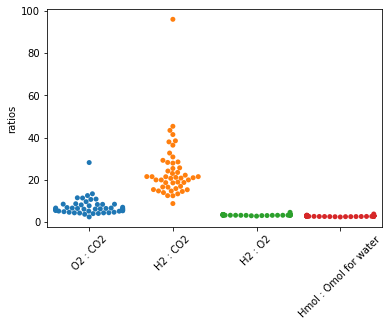

<Figure size 432x288 with 0 Axes>